In [3]:
# Assumption based weights and bias values for SVM demostration.
import numpy as np

# Define weights, bias, and dataset
weights = np.array([2, -1])  # w1 and w2
bias = 3  # b

# Dataset (x1, x2)
data_points = np.array([
    [4.5, 2.3],
    [-1.2, 3.4],
    [5.1, 1.7],
    [-0.8, 4.0]
])

# Function to calculate the decision value and predict class
def classify(points, weights, bias):
    results = []
    for point in points:
        # Calculate the decision function
        decision_value = np.dot(weights, point) + bias
        # Apply the sign function
        prediction = np.sign(decision_value)
        # Store results
        results.append((point, decision_value, prediction))
    return results

# Classify the points
results = classify(data_points, weights, bias)

# Print results
print(f"{'Point (x1, x2)':<20} {'f(x)':<10} {'Prediction':<10}")
print("-" * 40)
for point, decision_value, prediction in results:
    print(f"{str(tuple(point)):<20} {decision_value:<10.2f} {int(prediction):<10}")


Point (x1, x2)       f(x)       Prediction
----------------------------------------
(4.5, 2.3)           9.70       1         
(-1.2, 3.4)          -2.80      -1        
(5.1, 1.7)           11.50      1         
(-0.8, 4.0)          -2.60      -1        


### Optimization Approach

#### 1. Objective Function (Hinge Loss):
In SVM, the goal is to maximize the margin between the classes while minimizing classification errors. This can be expressed as:

$$
\text{Minimize: } \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (\mathbf{w}^T \mathbf{x}_i + b))
$$

Where:
- ||w||^2 : Regularization term to prevent overfitting.
- C: Regularization hyperparameter that controls the tradeoff between margin maximization and misclassification.
- Yi : True Label {+1, -1}
- Xi : Feature vector of the 𝑖-th data point.



##### Steps to Apply Optimization:
* Step 1: Use the labeled dataset to calculate the loss using the hinge loss function.
* Step 2: Use an optimization algorithm like gradient descent or SMO (Sequential Minimal Optimization) to update 𝑤 and 𝑏.
* Step 3: Iterate until convergence or when the loss is minimized.

In [1]:
from sklearn.svm import SVC
import numpy as np

# Define the dataset (features and labels)
X = np.array([
    [4.5, 2.3],
    [-1.2, 3.4],
    [5.1, 1.7],
    [-0.8, 4.0]
])

# Labels (+1 or -1)
y = np.array([1, -1, 1, -1])

# Create and train an SVM classifier
svm = SVC(kernel='linear', C=1.0)  # Linear kernel for linear decision boundary
svm.fit(X, y)

# Get the optimized weights and bias
weights = svm.coef_[0]  # Optimized weights
bias = svm.intercept_[0]  # Optimized bias

# Print results
print("Optimized Weights (w):", weights)
print("Optimized Bias (b):", bias)

# Predict on the dataset
predictions = svm.predict(X)
print("\nPredictions:", predictions)

# Manual classification using the optimized parameters
decision_values = np.dot(X, weights) + bias
print("\nDecision Values:", decision_values)


Optimized Weights (w): [ 0.34215623 -0.10974822]
Optimized Bias (b): -0.28728216498012216

Predictions: [ 1 -1  1 -1]

Decision Values: [ 0.99999994 -1.0710136   1.27114262 -1.00000004]


<h1>Step-by-Step Example</h1>
<h3>Dataset:</h3>
We have two classes, with three 2D data points:
<br />
<img src="imgs/dataset-1.png">

**Objective of SVM**

SVM finds the optimal hyperplane that separates two classes in such a way that the margin (distance between the hyperplane and the nearest data points of each class) is maximized.

1. Equation of a Hyperplane in 𝑛-dimensional space: <br />
    𝑤⋅𝑥+𝑏=0
<p> Where, 
𝑤 is the weight vector (perpendicular to the hyperplane),
𝑥 is the feature vector,
𝑏 is the bias term.</p>

2. Decision Rule: To classify a point 𝑥𝑖: <br/>
   𝑓(𝑥𝑖) > 0: Class  1 <br/>
   𝑓(𝑥𝑖) < 0:   Class -1



**Optimization Goal**
Maximize the margin (𝑀) between the hyperplane and the nearest points from each class, called support vectors.
1. Margin is given by:
   $$ M = \frac{2}{\|w\|} $$
   For correct classification:<br/>
   Thus, minimizing $$ \|w\|^2 $$  indirectly maximizes 𝑀.
2. Constraints: <br/>
   For class 1 (𝑦=1): 𝑤 ⋅ 𝑥𝑖 + 𝑏 ≥ 1,<br/>
   For class -1 (𝑦=−1): 𝑤 ⋅ 𝑥𝑖 + 𝑏 ≤ −1 <br/>
   These can be combined into: 𝑦𝑖 ( 𝑤 ⋅ 𝑥𝑖 + 𝑏  ) ≥ 1 ∀𝑖 
3. Optimization Problem: <br/>
   


   Minimize:
$$
\frac{1}{2} \|w\|^2
$$

Subject to:
$$
y_i (w \cdot x_i + b) \geq 1
$$

This is a quadratic optimization problem, solved using techniques like Lagrange multipliers

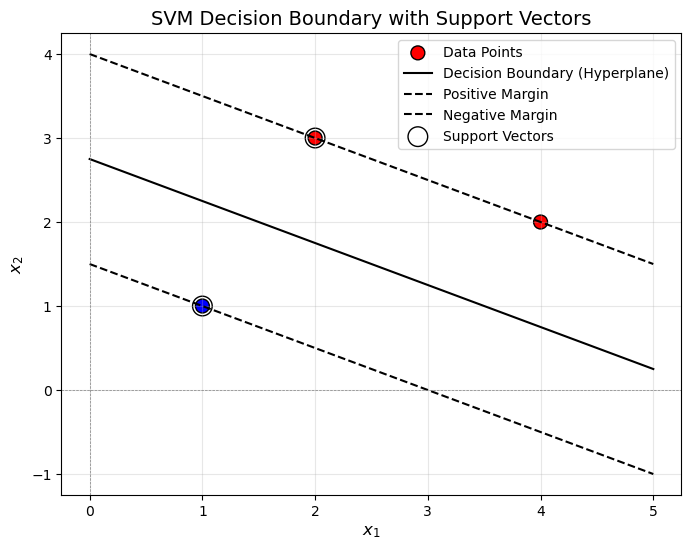

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dataset: Points and labels
X = np.array([[2, 3], [4, 2], [1, 1]])  # Points (x1, x2)
y = np.array([1, 1, -1])                # Labels

# SVM Classifier with Linear Kernel
svm = SVC(kernel='linear', C=1E10)  # High C value for hard margin
svm.fit(X, y)

# Extract hyperplane parameters
w = svm.coef_[0]  # Coefficients for the hyperplane
b = svm.intercept_[0]  # Intercept
margin = 1 / np.sqrt(np.sum(w ** 2))  # Margin size

# Decision boundary (w1*x1 + w2*x2 + b = 0)
xx = np.linspace(0, 5, 100)  # Range of x1 values
yy = -(w[0] * xx + b) / w[1]  # Corresponding x2 values

# Margins (distance = 1 from the decision boundary)
yy_margin_pos = yy + margin * np.sqrt(1 + (w[0] / w[1]) ** 2)
yy_margin_neg = yy - margin * np.sqrt(1 + (w[0] / w[1]) ** 2)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k', label='Data Points')

# Plot the decision boundary and margins
plt.plot(xx, yy, 'k-', label='Decision Boundary (Hyperplane)')
plt.plot(xx, yy_margin_pos, 'k--', label='Positive Margin')
plt.plot(xx, yy_margin_neg, 'k--', label='Negative Margin')

# Highlight support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Annotate and style the plot
plt.title('SVM Decision Boundary with Support Vectors', fontsize=14)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


### Example: Binary Classification with SVM

Accuracy: 100.00%


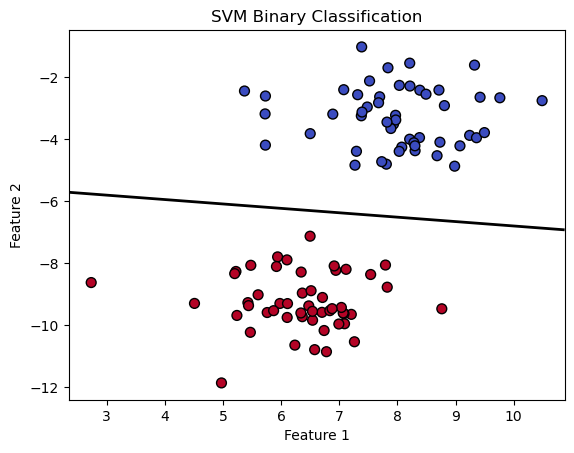

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the SVM model
model = SVC(kernel='linear')  # Linear kernel for simplicity
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualize the decision boundary
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')

# Plot the decision boundary
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100),
    np.linspace(ylim[0], ylim[1], 100)
)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

plt.title("SVM Binary Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Mapping 1D into 2D using the following methods
- Basic Method
- use index as 2nd dimension
- statistical transformation
- 

**Basic Method**

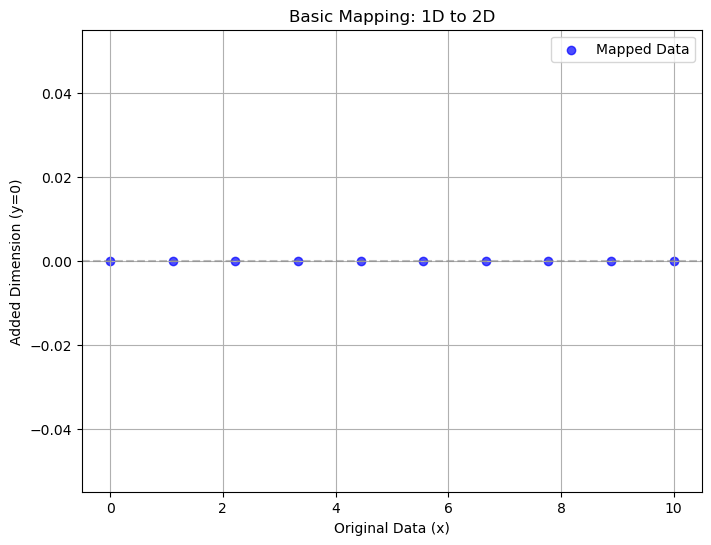

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1D data points
x = np.linspace(0, 10, 10)  # 1D data points

# Map 1D data into 2D space with a second dimension filled with zeros
x_2d = np.column_stack((x, np.zeros_like(x)))  # [(x1, 0), (x2, 0), ...]

# Plot the mapped 2D data
plt.figure(figsize=(8, 6))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c='blue', alpha=0.7, label="Mapped Data")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Basic Mapping: 1D to 2D")
plt.xlabel("Original Data (x)")
plt.ylabel("Added Dimension (y=0)")
plt.legend()
plt.grid()
plt.show()


**Use index as a 2nd Dim**

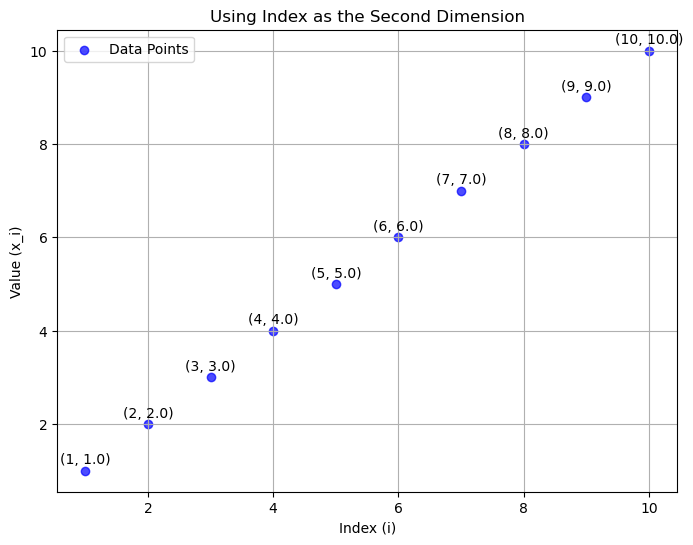

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1D data
data = np.linspace(1, 10, 10)  # 1D data points

# Use indices as the first dimension
indices = np.arange(1, len(data) + 1)  # Index starts from 1

# Create 2D data
data_2d = list(zip(indices, data))  # [(1, 1), (2, 2), (3, 3)...(10,10)]

# Extract for plotting
x_indices = indices
y_values = data

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(x_indices, y_values, c='blue', alpha=0.7, label="Data Points")
for i, txt in enumerate(data_2d):
    plt.annotate(f"{txt}", (x_indices[i], y_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Using Index as the Second Dimension")
plt.xlabel("Index (i)")
plt.ylabel("Value (x_i)")
plt.grid()
plt.legend()
plt.show()


### Statistical transformations

**numpy.convolve:**

convolve method is included in the NumPy library. <br/>
It is used to perform the convolution operation between two 1-dimensional arrays. The convolution operation is widely used in signal and image processing. <br/>
It is a mathematical operation that is used to combine two functions to produce a single function.

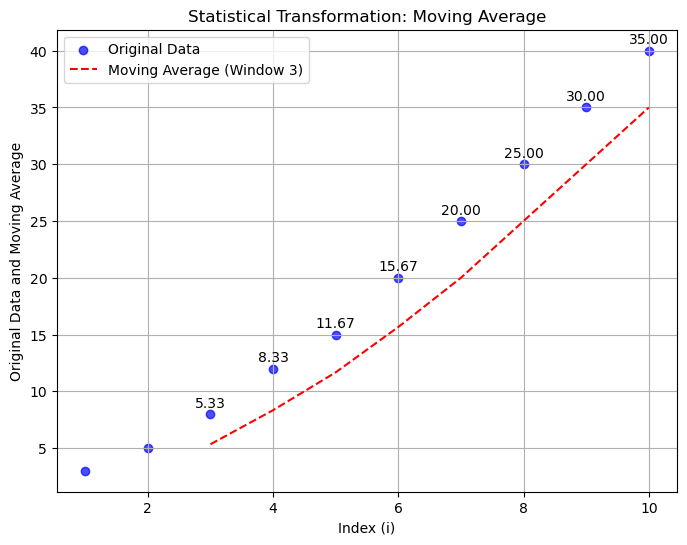

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Original 1D data
data = [3, 5, 8, 12, 15, 20, 25, 30, 35, 40]

# Calculate moving average with a window size of 3
window_size = 3
# print('Results of using ones',np.ones(window_size))
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Create 2D Data: Pairing original data with the moving average
# Padding the moving average to match the length of original data
moving_avg_padded = [np.nan] * (window_size - 1) + list(moving_avg)

# Create indices for original data points
indices = np.arange(1, len(data) + 1)  # Indices for the original data

# Plot the 2D data: Original data and moving average
plt.figure(figsize=(8, 6))
plt.scatter(indices, data, c='blue', label="Original Data", alpha=0.7)
plt.plot(indices, moving_avg_padded, c='red', label=f"Moving Average (Window {window_size})", linestyle='--')

# Annotate the moving averages
for i, avg in enumerate(moving_avg_padded):
    if not np.isnan(avg):
        plt.annotate(f"{avg:.2f}", (indices[i], data[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Statistical Transformation: Moving Average")
plt.xlabel("Index (i)")
plt.ylabel("Original Data and Moving Average")
plt.legend()
plt.grid(True)
plt.show()


### trigonometric mapping

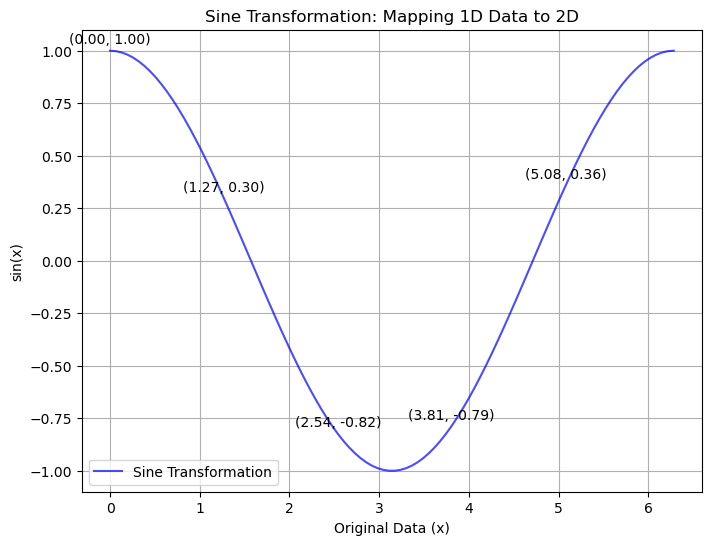

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Original 1D data (can be any numerical sequence)
x = np.linspace(0, 2 * np.pi, 100)  # Values from 0 to 2π for periodic behavior

# Apply sine transformation
y1 = np.cos(x)  # y1 = cos(x)

# Create 2D data: (x, y1)
data_2d = list(zip(x, y1))

# Plot the transformed 2D data
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="Sine Transformation", color='blue', alpha=0.7)

# Annotate a few points for clarity
for i in range(0, len(x), 20):  # Annotate every 20th point
    plt.annotate(f"({x[i]:.2f}, {y1[i]:.2f})", (x[i], y1[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Sine Transformation: Mapping 1D Data to 2D")
plt.xlabel("Original Data (x)")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True)
plt.show()

### Polynomial transformation

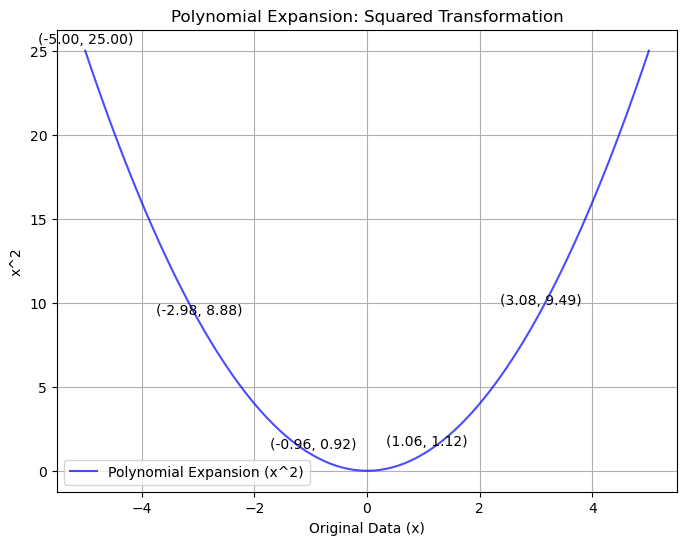

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Original 1D data (can be any numerical sequence)
x = np.linspace(-5, 5, 100)  # Values from -5 to 5 for diversity

# Polynomial expansion: square the data
x_squared = x ** 2  # x_i^2

# Create 2D data: (x, x^2)
data_2d = list(zip(x, x_squared))

# Plot the transformed 2D data
plt.figure(figsize=(8, 6))
plt.plot(x, x_squared, label="Polynomial Expansion (x^2)", color='blue', alpha=0.7)

# Annotate a few points for clarity
for i in range(0, len(x), 20):  # Annotate every 20th point
    plt.annotate(f"({x[i]:.2f}, {x_squared[i]:.2f})", (x[i], x_squared[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Polynomial Expansion: Squared Transformation")
plt.xlabel("Original Data (x)")
plt.ylabel("x^2")
plt.legend()
plt.grid(True)
plt.show()


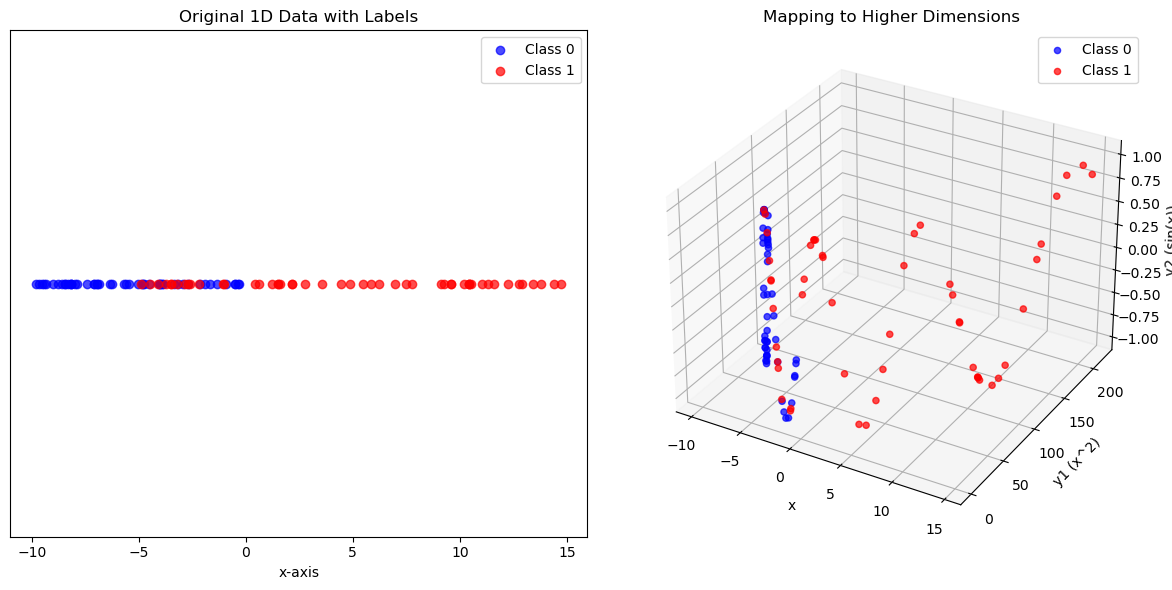

In [43]:
# Generate 1D data points with two labels
np.random.seed(42)  # For reproducibility
x_class1 = np.random.uniform(-10, 0, 50)  # Class 1: Points in range [-10, 0]
x_class2 = np.random.uniform(-5, 15, 50)   # Class 2: Points in range [0, 10]

# Assign labels
labels_class1 = np.zeros_like(x_class1)  # Label 0 for class 1
labels_class2 = np.ones_like(x_class2)   # Label 1 for class 2

# Combine data and labels
x = np.concatenate([x_class1, x_class2])
labels = np.concatenate([labels_class1, labels_class2])

# Map 1D data into higher dimensions
y1 = x**2            # Quadratic mapping
y2 = np.sin(x)       # Trigonometric mapping

# Plot the original 1D data with labels
fig = plt.figure(figsize=(12, 6))

# 1D representation with labels
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x_class1, np.zeros_like(x_class1), c='blue', label="Class 0", alpha=0.7)
ax1.scatter(x_class2, np.zeros_like(x_class2), c='red', label="Class 1", alpha=0.7)
ax1.set_title("Original 1D Data with Labels")
ax1.set_xlabel("x-axis")
ax1.set_yticks([])
ax1.legend()

# Higher-dimensional mapping
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x[labels == 0], y1[labels == 0], y2[labels == 0], c='blue', label="Class 0", alpha=0.7)
ax2.scatter(x[labels == 1], y1[labels == 1], y2[labels == 1], c='red', label="Class 1", alpha=0.7)
ax2.set_title("Mapping to Higher Dimensions")
ax2.set_xlabel("x")
ax2.set_ylabel("y1 (x^2)")
ax2.set_zlabel("y2 (sin(x))")
ax2.legend()

plt.tight_layout()
plt.show()


Accuracy of Kernel SVM with RBF kernel: 0.70


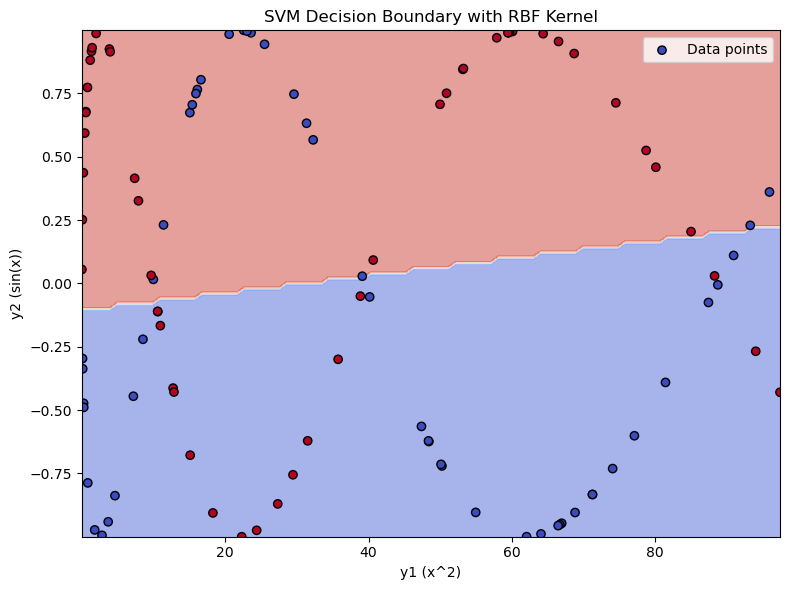

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate 1D data points with two class labels
np.random.seed(42)  # For reproducibility
x_class1 = np.random.uniform(-10, 0, 50)  # Class 1: Points in range [-10, 0]
x_class2 = np.random.uniform(0, 10, 50)   # Class 2: Points in range [0, 10]

# Assign labels
labels_class1 = np.zeros_like(x_class1)  # Label 0 for class 1
labels_class2 = np.ones_like(x_class2)   # Label 1 for class 2

# Combine data and labels
x = np.concatenate([x_class1, x_class2])
labels = np.concatenate([labels_class1, labels_class2])

# Step 2: Map 1D data into higher dimensions
y1 = x**2            # Quadratic mapping (1D -> 2D)
y2 = np.sin(x)       # Trigonometric mapping (1D -> 2D)

# Combine y1 and y2 into a feature matrix (higher-dimensional space)
X = np.vstack((y1, y2)).T  # Shape (100, 2)

# Step 3: Apply Kernel SVM to classify the transformed data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Initialize the SVM with an RBF kernel
svm = SVC(kernel='linear', gamma='scale')  # Using 'scale' for automatic gamma scaling

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Kernel SVM with RBF kernel: {accuracy:.2f}")

# Step 4: Visualize the classification and decision boundary

# Plot the decision boundary and data points
fig, ax = plt.subplots(figsize=(8, 6))

# Create a mesh grid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict the labels for each point in the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

# Plot the original data points (after transformation)
ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolors='k', marker='o', label="Data points")
ax.set_title("SVM Decision Boundary with RBF Kernel")
ax.set_xlabel("y1 (x^2)")
ax.set_ylabel("y2 (sin(x))")
ax.legend()

plt.tight_layout()
plt.show()
